<a href="https://colab.research.google.com/github/AatirNadim/Colab-Notebooks/blob/main/Extra_Trees_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,2]
X

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
X['Year']=X['Year'].map((lambda x:2020-x))
X

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,4,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,5,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,11,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,3,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
X=pd.get_dummies(X, drop_first=True)
X

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,4,9.50,11.60,33988,0,1,0,0,1
297,5,4.00,5.90,60000,0,0,1,0,1
298,11,3.35,11.00,87934,0,0,1,0,1
299,3,11.50,12.50,9000,0,1,0,0,1


In [ ]:
X=X.drop(columns=['Selling_Price'], axis=1)
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6,5.59,27000,0,0,1,0,1
1,7,9.54,43000,0,1,0,0,1
2,3,9.85,6900,0,0,1,0,1
3,9,4.15,5200,0,0,1,0,1
4,6,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,4,11.60,33988,0,1,0,0,1
297,5,5.90,60000,0,0,1,0,1
298,11,11.00,87934,0,0,1,0,1
299,3,12.50,9000,0,1,0,0,1


In [ ]:
y.isna().sum()


0

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
exModel=ExtraTreesRegressor()
exModel.fit(X, y)

ExtraTreesRegressor()

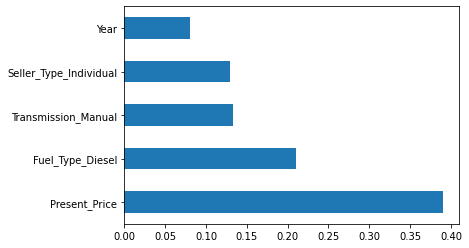

In [ ]:
importances=exModel.feature_importances_
featureData=pd.Series(importances, index=X.columns)
featureData.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(i) for i in np.linspace(start=100,stop=1200, num=12)]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5,30, num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

for i in random_grid.keys():
  print(f"{i} -->{random_grid[i]}")

n_estimators -->[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
max_features -->['auto', 'sqrt']
max_depth -->[5, 10, 15, 20, 25, 30]
min_samples_split -->[2, 5, 10, 15, 100]
min_samples_leaf -->[1, 2, 5, 10]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
74,6,8.93,83000,0,1,0,0,1
239,8,4.43,23709,0,0,1,0,1
64,3,36.23,6000,0,1,0,0,0
294,6,6.80,33019,0,0,1,0,1
286,4,7.90,28569,0,0,1,0,1
...,...,...,...,...,...,...,...,...
251,7,9.90,56701,0,0,1,0,1
192,13,0.75,49000,1,0,1,1,1
117,5,1.90,14000,0,0,1,1,1
47,14,4.15,65000,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[-0.14709233,  0.1466226 ,  1.05706025, ..., -2.02642122,
        -0.7540739 ,  0.37073003],
       [ 0.53179535, -0.35552552, -0.3529268 , ...,  0.49348082,
        -0.7540739 ,  0.37073003],
       [-1.16542386,  3.19298791, -0.77406088, ..., -2.02642122,
        -0.7540739 , -2.69738059],
       ...,
       [-0.48653618, -0.63784436, -0.58381453, ...,  0.49348082,
         1.32612997,  0.37073003],
       [ 2.56845841, -0.3867703 ,  0.62900596, ...,  0.49348082,
        -0.7540739 ,  0.37073003],
       [-0.14709233, -0.77844584, -0.59094876, ...,  0.49348082,
         1.32612997,  0.37073003]])

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
y_pred=rf_random.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean squared error is {}'.format(mean_absolute_error(y_pred, y_test)))
print('Mean squared error is {}'.format(mean_absolute_error(y_test, y_pred)))


Mean squared error is 0.7122701437025692
Mean squared error is 0.7122701437025692


In [ ]:
rfModel=RandomForestRegressor()
rfModel=rf_random


In [ ]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}
-3.492335456182623


In [ ]:
rfModel1=RandomForestRegressor(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20)

In [ ]:
rfModel1.fit(X_train, y_train)
importances1=rfModel1.feature_importances_

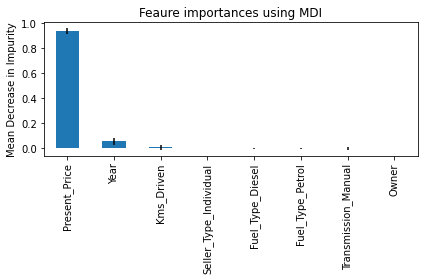

In [ ]:
std=np.std([tree.feature_importances_ for tree in rfModel1.estimators_],axis=0)
forest_importances1=pd.Series(importances1, index=X.columns)
forest_importances1=forest_importances1.sort_values(ascending=False)
fig1,ax1=plt.subplots()
forest_importances1.plot.bar(yerr=std, ax=ax1)
ax1.set_title('Feaure importances using MDI')
ax1.set_ylabel('Mean Decrease in Impurity')
fig1.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBClassifier
xgModel=XGBClassifier(n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features='auto', max_depth=20) 

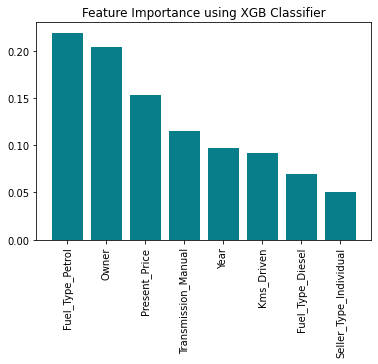

In [ ]:
xgModel.fit(X_train, y_train)
xg_importance=pd.DataFrame(data={'Attributes':X.columns, 'Importance':xgModel.feature_importances_})
xg_importance=xg_importance.sort_values(by='Importance', ascending=False)
plt.bar(x=xg_importance['Attributes'], height=xg_importance['Importance'], color='#087E8B')
plt.title('Feature Importance using XGB Classifier')
plt.xticks(rotation='vertical')
plt.show()